In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.ticker import MultipleLocator, FixedLocator, FixedFormatter
import seaborn as sns

In [3]:
# when on kaggle 
#data = pd.read_csv("/kaggle/input/cattells-16-personality-factors/16PF/data.csv",delimiter="\t")

# when on local
data = pd.read_csv("data.csv",delimiter="\t")

In [4]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P7,P8,P9,P10,age,gender,accuracy,country,source,elapsed
0,1,4,2,3,3,2,3,4,4,3,...,1,2,5,2,17,1,92,US,6,914
1,4,3,4,3,4,4,4,4,2,2,...,3,2,2,2,37,1,100,US,1,891
2,3,4,4,4,4,4,4,3,2,2,...,2,3,3,3,31,1,80,US,6,903
3,4,5,4,4,4,3,3,2,2,2,...,2,3,4,4,32,1,93,US,1,806
4,4,0,4,4,4,3,5,1,2,4,...,4,2,3,2,46,2,87,NZ,1,1826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,24,1,100,IN,1,274
49155,4,5,4,4,4,3,5,3,2,3,...,3,4,4,4,22,1,50,ZA,1,584
49156,2,4,2,3,3,3,4,4,2,4,...,3,4,5,4,29,2,85,BE,6,932
49157,4,4,4,4,4,4,4,4,1,3,...,2,4,5,4,48,1,95,CZ,2,1212


In [5]:
" ,".join(data.columns.tolist())

'A1 ,A2 ,A3 ,A4 ,A5 ,A6 ,A7 ,A8 ,A9 ,A10 ,B1 ,B2 ,B3 ,B4 ,B5 ,B6 ,B7 ,B8 ,B9 ,B10 ,B11 ,B12 ,B13 ,C1 ,C2 ,C3 ,C4 ,C5 ,C6 ,C7 ,C8 ,C9 ,C10 ,D1 ,D2 ,D3 ,D4 ,D5 ,D6 ,D7 ,D8 ,D9 ,D10 ,E1 ,E2 ,E3 ,E4 ,E5 ,E6 ,E7 ,E8 ,E9 ,E10 ,F1 ,F2 ,F3 ,F4 ,F5 ,F6 ,F7 ,F8 ,F9 ,F10 ,G1 ,G2 ,G3 ,G4 ,G5 ,G6 ,G7 ,G8 ,G9 ,G10 ,H1 ,H2 ,H3 ,H4 ,H5 ,H6 ,H7 ,H8 ,H9 ,H10 ,I1 ,I2 ,I3 ,I4 ,I5 ,I6 ,I7 ,I8 ,I9 ,I10 ,J1 ,J2 ,J3 ,J4 ,J5 ,J6 ,J7 ,J8 ,J9 ,J10 ,K1 ,K2 ,K3 ,K4 ,K5 ,K6 ,K7 ,K8 ,K9 ,K10 ,L1 ,L2 ,L3 ,L4 ,L5 ,L6 ,L7 ,L8 ,L9 ,L10 ,M1 ,M2 ,M3 ,M4 ,M5 ,M6 ,M7 ,M8 ,M9 ,M10 ,N1 ,N2 ,N3 ,N4 ,N5 ,N6 ,N7 ,N8 ,N9 ,N10 ,O1 ,O2 ,O3 ,O4 ,O5 ,O6 ,O7 ,O8 ,O9 ,O10 ,P1 ,P2 ,P3 ,P4 ,P5 ,P6 ,P7 ,P8 ,P9 ,P10 ,age ,gender ,accuracy ,country ,source ,elapsed'

In [6]:
pd.set_option('display.max_rows', None)

def description(data):
    '''
    Returns the DataFrame representing a thorough description of the data.
    '''
    dtypes = data.dtypes
    counts = data.apply(lambda col: col.count())
    nulls = data.apply(lambda col: col.isnull().sum())
    nan_ratio = nulls / counts
    uniques = data.apply(lambda col: col.unique())
    n_uniques = data.apply(lambda col: col.nunique())
    #maxs = data.apply(lambda col: col.max())
    #mins = data.apply(lambda col: col.min())
    
    cols = {'dtypes':dtypes, 'counts':counts, 'nulls' : nulls, 'nan_ratio': nan_ratio,
            'n_uniques':n_uniques, 'uniques':uniques}
    return pd.DataFrame(data=cols)

In [7]:
description(data)

,dtypes,counts,nulls,nan_ratio,n_uniques,uniques
A1,int64,49159,0,0.000000,6,"[1, 4, 3, 2, 5, 0]"
A2,int64,49159,0,0.000000,6,"[4, 3, 5, 0, 2, 1]"
A3,int64,49159,0,0.000000,6,"[2, 4, 5, 3, 1, 0]"
A4,int64,49159,0,0.000000,6,"[3, 4, 5, 1, 2, 0]"
A5,int64,49159,0,0.000000,6,"[3, 4, 2, 5, 1, 0]"
A6,int64,49159,0,0.000000,6,"[2, 4, 3, 5, 1, 0]"
A7,int64,49159,0,0.000000,6,"[3, 4, 5, 2, 1, 0]"
A8,int64,49159,0,0.000000,6,"[4, 3, 2, 1, 5, 0]"
A9,int64,49159,0,0.000000,6,"[4, 2, 1, 3, 5, 0]"
A10,int64,49159,0,0.000000,6,"[3, 2, 4, 1, 5, 0]"


In [8]:
pd.set_option('display.max_rows', 50)

In [9]:
null_rows = data[data['country'].isnull()]
null_rows

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P7,P8,P9,P10,age,gender,accuracy,country,source,elapsed
16600,3,4,4,2,4,2,2,2,4,4,...,4,4,4,3,26,2,100,NaN,1,904
18248,5,1,5,1,1,1,5,5,5,2,...,5,1,5,1,53,1,100,NaN,1,743
19884,2,4,2,4,5,2,4,2,2,2,...,4,4,4,3,40,1,85,NaN,6,611
29619,4,4,4,5,5,5,4,1,1,1,...,4,3,4,4,23,1,87,NaN,1,1233
37107,4,4,4,4,3,2,4,2,2,4,...,4,2,4,4,60,1,85,NaN,6,1013
40277,4,4,4,4,4,4,4,4,2,3,...,2,2,4,2,28,1,98,NaN,6,1071
40342,5,2,5,4,5,4,5,1,1,4,...,5,5,1,1,33,2,100,NaN,1,1255
43545,5,5,5,4,5,4,5,4,1,1,...,2,2,5,5,49,2,100,NaN,1,722
46365,3,4,4,4,4,5,4,4,1,1,...,1,2,4,4,44,2,85,NaN,1,1229
46960,5,5,5,5,5,5,5,1,1,5,...,2,2,4,3,49,2,100,NaN,6,1224


In [10]:
data = data.drop(null_rows.index,axis=0)

In [11]:
# Check if null rows have been deleted.
data[data['country'].isnull()]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P7,P8,P9,P10,age,gender,accuracy,country,source,elapsed


## Data Preprocessing

In [12]:
# Encoding the categorical features

label_encoder = LabelEncoder()
data['country_encoded'] = label_encoder.fit_transform(data['country'].astype(str))
data = data.drop(['country'], axis=1)

In [13]:
# Standard scaling all features
std = StandardScaler()
data_std = pd.DataFrame(std.fit_transform(data), columns=data.columns)
data_std

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P7,P8,P9,P10,age,gender,accuracy,source,elapsed,country_encoded
0,-2.322189,0.196762,-1.629391,-0.593583,-0.834739,-1.711725,-0.901521,0.891446,1.782818,0.529186,...,-1.536880,-0.769567,1.228818,-1.307875,-0.004512,-1.174835,-0.004901,1.415457,-0.031331,0.857318
1,0.307235,-0.747595,0.181998,-0.593583,0.172919,0.337674,0.134893,0.891446,-0.134550,-0.397389,...,0.173851,-0.769567,-1.489380,-1.307875,-0.004510,-1.174835,-0.004900,-0.833789,-0.031784,0.857318
2,-0.569239,0.196762,0.181998,0.343390,0.172919,0.337674,0.134893,0.033553,-0.134550,-0.397389,...,-0.681515,0.056949,-0.583314,-0.414556,-0.004511,-1.174835,-0.004902,1.415457,-0.031547,0.857318
3,0.307235,1.141119,0.181998,0.343390,0.172919,-0.687025,-0.901521,-0.824340,-0.134550,-0.397389,...,-0.681515,0.056949,0.322752,0.478762,-0.004511,-1.174835,-0.004900,-0.833789,-0.033456,0.857318
4,0.307235,-3.580666,0.181998,0.343390,0.172919,-0.687025,1.171306,-1.682232,-0.134550,1.455761,...,1.029217,-0.769567,-0.583314,-1.307875,-0.004509,0.782440,-0.004901,-0.833789,-0.013391,0.080833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49137,-2.322189,-2.636309,-2.535086,-2.467530,-2.850056,-2.736424,-2.974348,-1.682232,-1.093233,-1.323964,...,-1.536880,-1.596083,-2.395446,-2.201194,-0.004512,-1.174835,-0.004900,-0.833789,-0.043920,-0.716086
49138,0.307235,1.141119,0.181998,0.343390,0.172919,-0.687025,1.171306,0.033553,-0.134550,0.529186,...,0.173851,0.883465,0.322752,0.478762,-0.004512,-1.174835,-0.004905,-0.833789,-0.037822,1.020788
49139,-1.445714,0.196762,-1.629391,-0.593583,-0.834739,-0.687025,0.134893,0.891446,-0.134550,1.455761,...,0.173851,0.883465,1.228818,0.478762,-0.004511,0.782440,-0.004901,1.415457,-0.030977,-1.778643
49140,0.307235,0.196762,0.181998,0.343390,0.172919,0.337674,0.134893,0.891446,-1.093233,0.529186,...,-0.681515,0.883465,1.228818,0.478762,-0.004509,-1.174835,-0.004900,-0.383940,-0.025469,-1.390401


In [14]:
# Reducing dimensions to 3.
pca = PCA(n_components=3, random_state=12)  
data_reduced = pd.DataFrame(pca.fit_transform(data_std),)

data_reduced.head()

,0,1,2
0,3.805594,-3.292238,4.613763
1,3.268640,-0.007686,2.515714
2,3.003524,-0.035569,3.080743
3,2.711560,-0.689996,1.855456
4,1.220400,0.341906,0.775022


In [15]:
# Create a scatterplot.
trace = go.Scatter3d(x=data_reduced[0], y=data_reduced[1], z=data_reduced[2], mode='markers',
                     marker=dict(size=3 ,opacity=0.8, color='green'),)
    
layout = go.Layout(title=dict(text='3D Data', x=0.5), width=600, height=600)
fig = go.Figure(data=[trace], layout=layout)

fig.show()

## Clustering

### K-Means

FInding optimal number of clusters.

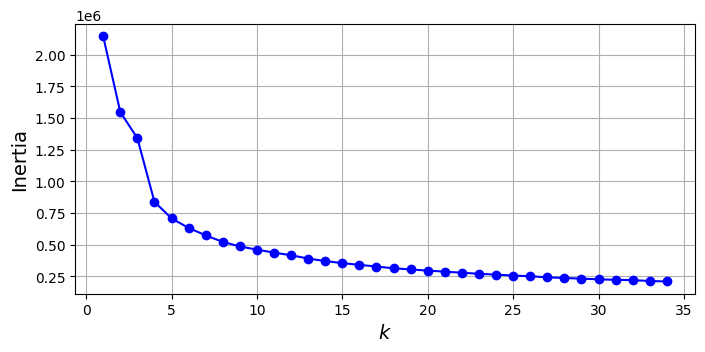

In [12]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=12, n_init='auto').fit(data_reduced) for k in range(1,35)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1,35), inertias, "bo-")

# plt.annotate('Elbow?',xy=(4, inertias[3]), xytext=(0.45, 0.55), textcoords='figure fraction',
#              fontsize=16, arrowprops=dict(facecolor='black', shrink=0.1))

plt.xlabel('$k$', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.grid(True)

In [13]:
silhouette_scores = [silhouette_score(data_reduced, model.labels_, random_state=12) 
                     for model in kmeans_per_k[1:15]]



KeyboardInterrupt: 

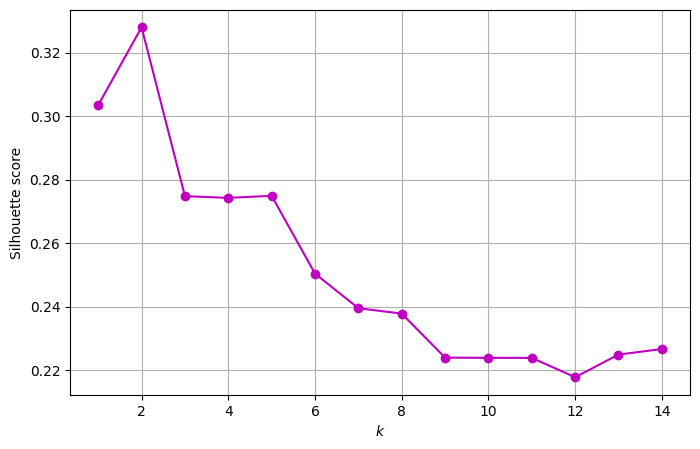

In [61]:
plt.figure(figsize=(8,5))
plt.plot(range(1,15),silhouette_scores,'mo-')
plt.xlabel("$k$", )
plt.ylabel("Silhouette score", )
plt.grid(True)

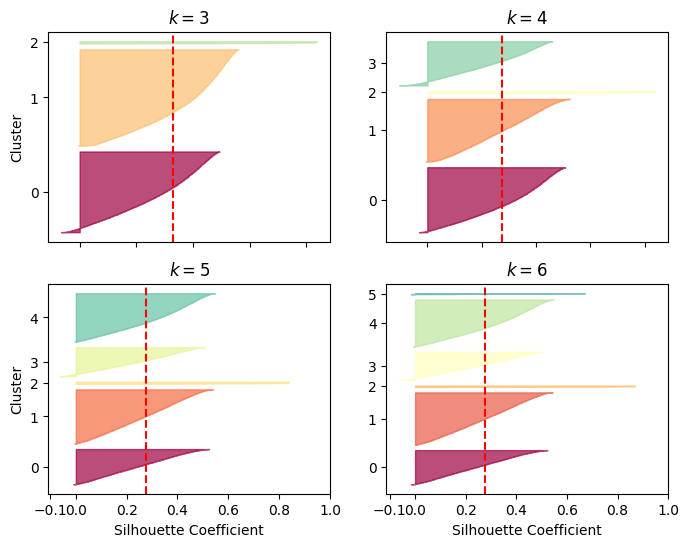

In [64]:
plt.figure(figsize=(8,6))

for k in (3,4,5,6):
    plt.subplot(2,2,k-2)
    
    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coeffs = silhouette_samples(data_reduced, y_pred)
    
    padding = len(data_reduced) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coeffs[y_pred == i]   # cluster coeffs
        coeffs.sort()
        
        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, 
                          edgecolor=color, alpha=0.7)
        
        ticks.append(pos + len(coeffs)//2)
        pos +=len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    if k in (3,5):
        plt.ylabel("Cluster")
    if k in (5,6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
    
    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    plt.title("$k={}$".format(k),)

In [16]:
data_copy=data.copy()

In [15]:
kmeans = KMeans(n_clusters=5, random_state=12, n_init='auto')

data_copy['kmeans_cluster'] = kmeans.fit_predict(data_reduced) # Fit the model and predict clusters
data_copy['kmeans_cluster'] = data_copy['kmeans_cluster'].astype('category')

In [17]:
def plot_clusters3d(cluster_groups, cluster_col, title, colorscale=None, legend=True):
    '''
    Creates a 3D scatterplot of clusters. The color of data points is determined by colorscale parameter.
    '''
    # Create a figure.
    fig = go.Figure()
    
    # Plot scatter points for each cluster.
    for cluster in cluster_groups[cluster_col].unique():
        # Get the data points for that specific cluster.
        cluster_group = cluster_groups[cluster_groups[cluster_col] == cluster]
        # Add some scatter belonging to the cluster to the plot.
        trace = go.Scatter3d(x=cluster_group[0], y=cluster_group[1], z=cluster_group[2], 
                             mode='markers', marker=dict(size=4 ,opacity=0.8, colorscale=colorscale), 
                             legendwidth=2, name=cluster,)
        fig.add_trace(trace)
        
    # Add title and legend.
    fig.update_layout(showlegend=legend, width=700, height=600, 
                      legend=dict(font=dict(size=20), itemsizing="constant", ),
                      title=dict(text=title, x=0.5))
    fig.show()

In [17]:
temp = data_reduced.copy()
cluster_col = 'kmeans_cluster'
temp[cluster_col] = data_copy[cluster_col].copy()
temp.sort_values(by=cluster_col, inplace=True)

plot_clusters3d(cluster_groups=temp, cluster_col=cluster_col, colorscale='rainbow',
                title='The Plot of Clusters (KMeans)')

KeyError: 'kmeans_cluster'

In [18]:
sns.countplot(x=data_copy['kmeans_cluster'], palette=sns.color_palette("pink"),edgecolor='black')
plt.title('Distribution of Clusters');

KeyError: 'kmeans_cluster'

In [19]:
kmeans = KMeans(n_clusters=16, random_state=12, n_init='auto')

data_copy['kmeans_cluster'] = kmeans.fit_predict(data_reduced) # Fit the model and predict clusters
data_copy['kmeans_cluster'] = data_copy['kmeans_cluster'].astype('category')

In [20]:
temp = data_reduced.copy()
cluster_col = 'kmeans_cluster'
temp[cluster_col] = data_copy[cluster_col].copy()
temp.sort_values(by=cluster_col, inplace=True)

plot_clusters3d(cluster_groups=temp, cluster_col=cluster_col, colorscale='rainbow',
                title='The Plot of Clusters (KMeans)')

NameError: name 'plot_clusters3d' is not defined

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



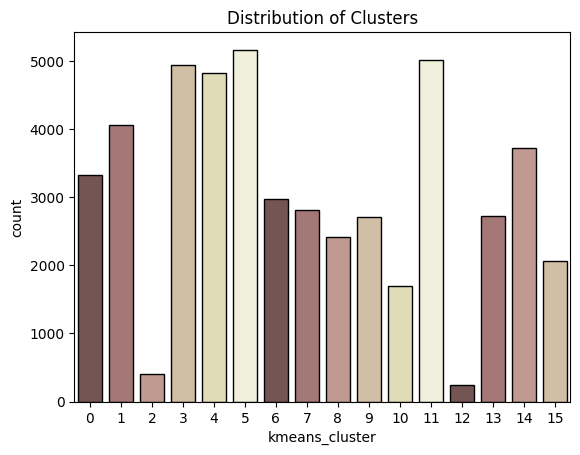

In [86]:
sns.countplot(x=data_copy['kmeans_cluster'], palette=sns.color_palette("pink"),edgecolor='black')
plt.title('Distribution of Clusters');

## Further steps:
- Finding feature importances using clf for Kmeans
- Analyzing the most important columns vs. generated by KMeans labels 
- BIRCH for clustering

In [21]:
data_copy

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P8,P9,P10,age,gender,accuracy,source,elapsed,country_encoded,kmeans_cluster
0,1,4,2,3,3,2,3,4,4,3,...,2,5,2,17,1,92,6,914,148,14
1,4,3,4,3,4,4,4,4,2,2,...,2,2,2,37,1,100,1,891,148,8
2,3,4,4,4,4,4,4,3,2,2,...,3,3,3,31,1,80,6,903,148,8
3,4,5,4,4,4,3,3,2,2,2,...,3,4,4,32,1,93,1,806,148,8
4,4,0,4,4,4,3,5,1,2,4,...,2,3,2,46,2,87,1,1826,110,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,1,1,1,1,1,1,1,1,1,1,...,1,1,1,24,1,100,1,274,71,11
49155,4,5,4,4,4,3,5,3,2,3,...,4,4,4,22,1,50,1,584,156,5
49156,2,4,2,3,3,3,4,4,2,4,...,4,5,4,29,2,85,6,932,19,12
49157,4,4,4,4,4,4,4,4,1,3,...,4,5,4,48,1,95,2,1212,38,13


In [22]:
data_copy.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P8,P9,P10,age,gender,accuracy,source,elapsed,country_encoded,kmeans_cluster
49154,1,1,1,1,1,1,1,1,1,1,...,1,1,1,24,1,100,1,274,71,11
49155,4,5,4,4,4,3,5,3,2,3,...,4,4,4,22,1,50,1,584,156,5
49156,2,4,2,3,3,3,4,4,2,4,...,4,5,4,29,2,85,6,932,19,12
49157,4,4,4,4,4,4,4,4,1,3,...,4,5,4,48,1,95,2,1212,38,13
49158,4,5,4,5,5,4,5,3,1,2,...,4,4,5,18,2,99,2,950,55,10


In [23]:


# Extract feature importances from the ET model and plot them.
# imp_features = pd.Series(clf.feature_importances_, 
#                          index = X_train.columns).sort_values(ascending=False)
# plt.figure(figsize=(7,6))
# sns.barplot(x=imp_features, y=imp_features.index, palette='winter')
# plt.title('Feature Importances', fontsize=14)
# plt.xlabel('Importance Score')

Using classification neural network on clustered dataset.

In [24]:
# data_copy without labels
classification_data = data_copy.drop(["kmeans_cluster"], axis=1)

# labels
classification_labels = data_copy["kmeans_cluster"]

In [25]:
# We should have standarized data for machine learning model

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
classification_data = scaler.fit_transform(classification_data)

In [26]:
classification_data

array([[-2.32218854,  0.19676187, -1.62939114, ...,  1.4154574 ,
        -0.03133109,  0.85731757],
       [ 0.30723518, -0.74759519,  0.18199773, ..., -0.83378941,
        -0.03178352,  0.85731757],
       [-0.5692394 ,  0.19676187,  0.18199773, ...,  1.4154574 ,
        -0.03154747,  0.85731757],
       ...,
       [-1.44571397,  0.19676187, -1.62939114, ...,  1.4154574 ,
        -0.03097701, -1.7786435 ],
       [ 0.30723518,  0.19676187,  0.18199773, ..., -0.38394005,
        -0.02546915, -1.39040117],
       [ 0.30723518,  1.14111894,  0.18199773, ..., -0.38394005,
        -0.03062293, -1.04302645]])

In [27]:
len(classification_data)

49142

In [28]:
len(classification_labels)

49142

In [29]:
classification_labels.head()

0    14
1     8
2     8
3     8
4     5
Name: kmeans_cluster, dtype: category
Categories (16, int32): [0, 1, 2, 3, ..., 12, 13, 14, 15]

In [30]:
classification_labels.tail()

49154    11
49155     5
49156    12
49157    13
49158    10
Name: kmeans_cluster, dtype: category
Categories (16, int32): [0, 1, 2, 3, ..., 12, 13, 14, 15]

In [31]:
classification_labels[0]

14

In [32]:
classification_data[0]

array([-2.32218854,  0.19676187, -1.62939114, -0.59358304, -0.83473948,
       -1.71172461, -0.90152071,  0.89144599,  1.78281757,  0.52918599,
        0.32018269,  0.46677838,  0.92895269, -0.37851597,  1.02972465,
        0.47095067,  1.34628432,  0.20675203, -1.57734409, -0.52911711,
       -1.37142202, -0.89450243, -0.95965586,  1.01122054,  1.1695028 ,
        0.60337905,  0.57138625, -0.76777883,  0.85080852,  1.00452294,
        0.55217845,  0.55702873, -0.45184095,  0.51187909, -0.27557953,
        1.3169559 ,  1.36324654,  0.36517488,  0.45778617,  0.31878475,
       -0.10763881,  1.08323823,  0.45024991, -1.30872101, -1.42517926,
        0.19204883,  0.20625789,  0.13357042,  1.74476588, -1.05357708,
       -0.08058004,  0.89367697,  1.38366028, -0.93125152, -1.53745571,
        1.58258986, -2.2726398 , -1.72163739,  1.28431941,  0.10780825,
        1.12599387,  1.28688459,  0.69577474, -0.38871344, -1.48602156,
        0.67589221, -1.04522048, -0.3212397 ,  0.91966191,  0.17

In [33]:
classification_data.shape

(49142, 169)

In [34]:
classification_labels.shape

(49142,)

In [35]:
# Check how many categories we have
classification_labels.nunique()

16

Good.

Creating basic neural network from scratch

In [36]:
import tensorflow as tf

cl_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(16, activation='softmax')
])

2024-04-23 22:51:22.436045: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 22:51:22.999952: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-04-23 22:51:23.620531: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-23 22:51:23.649511: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [37]:
cl_model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [38]:
# Find the best lr while fitting the model

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

In [39]:
cl_model.fit(classification_data, classification_labels, epochs=15, callbacks=[lr_scheduler])

Epoch 1/15


2024-04-23 22:51:31.560862: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-04-23 22:51:31.563099: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x3328ba80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-23 22:51:31.563118: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-04-23 22:51:31.567632: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-23 22:51:31.581264: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8907
2024-04-23 22:51:31.672925: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime o

1536/1536 [==============================] - 4s 2ms/step - loss: 2.0390 - accuracy: 0.3082 - lr: 0.0010
Epoch 2/15
1536/1536 [==============================] - 2s 2ms/step - loss: 1.0812 - accuracy: 0.6298 - lr: 0.0011
Epoch 3/15
1536/1536 [==============================] - 2s 1ms/step - loss: 0.7634 - accuracy: 0.7354 - lr: 0.0013
Epoch 4/15
1536/1536 [==============================] - 2s 1ms/step - loss: 0.6149 - accuracy: 0.7787 - lr: 0.0014
Epoch 5/15
1536/1536 [==============================] - 2s 1ms/step - loss: 0.5216 - accuracy: 0.8071 - lr: 0.0016
Epoch 6/15
1536/1536 [==============================] - 2s 1ms/step - loss: 0.4399 - accuracy: 0.8411 - lr: 0.0018
Epoch 7/15
1536/1536 [==============================] - 2s 1ms/step - loss: 0.3745 - accuracy: 0.8691 - lr: 0.0020
Epoch 8/15
1536/1536 [==============================] - 2s 1ms/step - loss: 0.3349 - accuracy: 0.8818 - lr: 0.0022
Epoch 9/15
1536/1536 [==============================] - 2s 1ms/step - loss: 0.3055 - accura

Weight-based methods:
Weight-based methods consider the weights or connections between the neurons in the neural network to estimate feature importance. Features with higher weights contribute more to the final predictions of the model.
If your neural network model is a fully connected network (dense layers), you can extract the weights from the model and calculate feature importance as follows:

In [41]:
# Get the weights from the model's layers
weights = cl_model.get_weights()

# Calculate feature importance as the sum of absolute weights for each feature
feature_importance = np.sum(np.abs(weights[0]), axis=1)


In [43]:
len(feature_importance)

169

In [45]:
# get 5 most important features and print them
most_important_features = np.argsort(feature_importance)[-5:]

most_important_features

array([ 32, 114,  19, 165, 163])

In [46]:
# get the names of the most important features
data.columns[most_important_features]


Index(['C10', 'L2', 'B10', 'accuracy', 'age'], dtype='object')

Gradient-based methods:
Gradient-based methods utilize the gradients of the network's output with respect to the input features to estimate their importance. A higher absolute gradient value indicates a greater impact on the network's output.
Let's assume you have a trained neural network model and a set of input data called X. You can calculate the feature importance using the gradient-based method as follows:

In [47]:
X = classification_data # Load your input data

# Compute gradients of the output with respect to the input
input_tensor = tf.convert_to_tensor(X)
with tf.GradientTape() as tape:
 tape.watch(input_tensor)
 output = cl_model(input_tensor)
gradients = tape.gradient(output, input_tensor)

# Calculate feature importance as the absolute mean of the gradients
feature_importance = np.mean(np.abs(gradients.numpy()), axis=0)


In [48]:
len(feature_importance)

169

In [49]:
# get 5 most important features and print them
most_important_features = np.argsort(feature_importance)[-5:]

data.columns[most_important_features]

Index(['D7', 'B10', 'D8', 'accuracy', 'age'], dtype='object')

Use random forest (feature importance built-in)

In [119]:
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict

# Assuming `data` is your original DataFrame and `labels` are the cluster labels
# Also assuming that your data is already standardized

num_clusters = classification_labels.nunique()

all_feature_importances = defaultdict(float)

# For each cluster
for i in range(num_clusters):
    # Create binary target variable: 1 for current cluster, 0 for other clusters
    y = (classification_labels == i).astype(int)
    
    clf = RandomForestClassifier(n_estimators=50, random_state=0)
    clf.fit(classification_data, y)
    
    feature_importance = clf.feature_importances_
    
    # Add feature importance to the total
    for feature, importance in zip(data.columns, feature_importance):
        all_feature_importances[feature] += importance


In [120]:
# top 5 features across all clusters
sorted_features = sorted(all_feature_importances.items(), key=lambda x: x[1], reverse=True)
print("Top 5 features across all clusters:")
for feature, importance in sorted_features[:5]:
    print(f"{feature}: {importance}")

Top 5 features across all clusters:
G1: 0.2586015457341791
elapsed: 0.19712611884470574
N6: 0.18912283397409083
C10: 0.17417955942961125
G5: 0.17339722191992168
